In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers,datasets
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(x_train, y_train),(x_test, y_test)=datasets.cifar10.load_data()
x_train=x_train/255
x_test=x_test/255

(50000, 32, 32, 3)

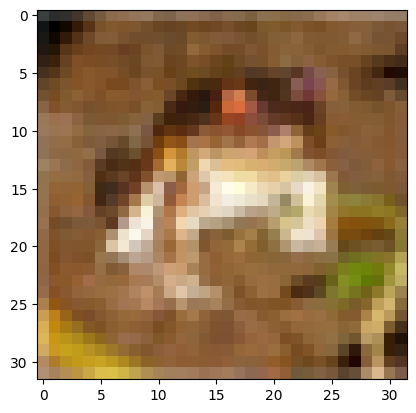

In [5]:
plt.imshow(x_train[0])
y_train=y_train.reshape(-1,)
x_train.shape

In [6]:
classes=["airplane","autombile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
cnn=models.Sequential([
     
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
   
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(200,activation="relu"),
    layers.Dense(10,activation="softmax")
])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [8]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 28s 17ms/step - loss: 1.4880 - accuracy: 0.4621
Epoch 2/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.1004 - accuracy: 0.6105
Epoch 3/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.9331 - accuracy: 0.6763
Epoch 4/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.8230 - accuracy: 0.7129
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7348 - accuracy: 0.7435
Epoch 6/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.6690 - accuracy: 0.7639
Epoch 7/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.6060 - accuracy: 0.7857
Epoch 8/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.5492 - accuracy: 0.8063
Epoch 9/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.4990 - accuracy: 0.8239
Epoch 10/10
1563/1563 [==============================] - 32s 20m

In [18]:
pred=cnn.predict(x_test)
pred[0]

313/313 [==============================] - 2s 7ms/step


array([7.4696657e-03, 5.9637907e-03, 8.8278000e-04, 9.2434657e-01,
       1.5418995e-04, 3.4177981e-02, 2.2371586e-04, 3.6936624e-03,
       1.8305611e-02, 4.7820038e-03], dtype=float32)

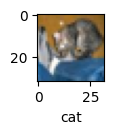

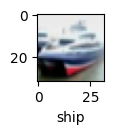

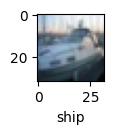

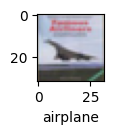

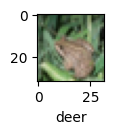

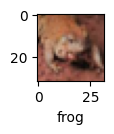

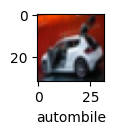

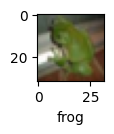

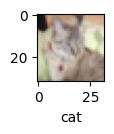

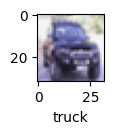

In [19]:
c=1
for i in range(10):
    figt=plt.figure(figsize=(5,5))
    plt.subplot(2,5,c)
    plt.imshow(x_test[i])
    plt.xlabel(classes[np.argmax(pred[i])])
    c+=1

In [13]:
for i in range(10):
    print(classes[y_test[i][0]])

cat
ship
ship
airplane
frog
frog
autombile
frog
cat
autombile
